In [1]:
import sys
sys.path.append("../..")

import helper as hlp
import pandas as pd

[nltk_data] Downloading package stopwords to C:\Users\Abdul
[nltk_data]     Manaf\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
EPOCHS = 50
MAX_LEN = 30
N_CLASSES = 2
BATCH_SIZE = 128
LEARNING_RATE = 2e-5
NAME = 'mBert(bert)-english'
MODEL_NAME = 'bert-base-multilingual-uncased'

# dir = '/content/drive/MyDrive/Hate Speech_Multilingual /Code/Dataset Statistics/dataset'
dir = '../../../Dataset Statistics/dataset'

# path = f'/content/drive/MyDrive/Hate Speech_Multilingual /Code/Model training/saved_models/{NAME}'
path = f'../saved_models/{NAME}'

In [3]:
train_df = pd.read_csv(f'{dir}/train.csv')
val_df = pd.read_csv(f'{dir}/val.csv')
test_df = pd.read_csv(f'{dir}/test.csv')

train_texts = train_df['english_text'].values
val_texts = val_df['english_text'].values
test_texts = test_df['english_text'].values

train_labels = train_df['class'].values
val_labels = val_df['class'].values
test_labels = test_df['class'].values

In [4]:
#show 5 values along with their labels
for i in range(5):
    print(train_texts[i], train_labels[i])

my hea aches for the friends and family of dead and injured in orlando...senseless #orlandohorror   #prayers 0
can't wait to get moved into our new home this weekend ð¡ð« and for a week off ð     @user â¤ï¸â¤ï¸â¤ï¸ 0
#cleaning #spaces. creating   #faces.  0
on route to ally pally #boxcup @user   @user @user @user  0
Please follow https://t.co/rC6EFF0AVH 0


In [5]:
#show 5 values along with their labels
for i in range(5):
    print(hlp.preprocess_text(train_texts[i], language="urdu")
    , train_labels[i])

my hea aches for the friends and family of dead and injured in orlandosenseless 0
cant wait to get moved into our new home this weekend ð¡ð« and for a week off ð â¤ï¸â¤ï¸â¤ï¸ 0
creating 0
on route to ally pally 0
please follow 0


In [6]:
## apply preprocessing to all texts
train_texts = [hlp.preprocess_text(text) for text in train_texts]
val_texts = [hlp.preprocess_text(text) for text in val_texts]
test_texts = [hlp.preprocess_text(text) for text in test_texts]

In [7]:
## mbert model and tokenizer
import torch

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

from transformers import BertTokenizer
tokenizer = BertTokenizer.from_pretrained(MODEL_NAME)

from transformers import BertForSequenceClassification
model = BertForSequenceClassification.from_pretrained(MODEL_NAME, num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(
Some weights of BertForSequenceClassification were not initialized from the model checkpoint at bert-base-multilingual-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


BertForSequenceClassification(
  (bert): BertModel(
    (embeddings): BertEmbeddings(
      (word_embeddings): Embedding(105879, 768, padding_idx=0)
      (position_embeddings): Embedding(512, 768)
      (token_type_embeddings): Embedding(2, 768)
      (LayerNorm): LayerNorm((768,), eps=1e-12, elementwise_affine=True)
      (dropout): Dropout(p=0.1, inplace=False)
    )
    (encoder): BertEncoder(
      (layer): ModuleList(
        (0): BertLayer(
          (attention): BertAttention(
            (self): BertSelfAttention(
              (query): Linear(in_features=768, out_features=768, bias=True)
              (key): Linear(in_features=768, out_features=768, bias=True)
              (value): Linear(in_features=768, out_features=768, bias=True)
              (dropout): Dropout(p=0.1, inplace=False)
            )
            (output): BertSelfOutput(
              (dense): Linear(in_features=768, out_features=768, bias=True)
              (LayerNorm): LayerNorm((768,), eps=1e-12, elemen

In [8]:
train_data_loader = hlp.create_data_loader(train_texts, train_labels, tokenizer, MAX_LEN, BATCH_SIZE)
val_data_loader = hlp.create_data_loader(val_texts, val_labels, tokenizer, MAX_LEN, BATCH_SIZE)

history = hlp.train_model(train_data_loader, val_data_loader, model, optimizer, device, EPOCHS, tokenizer, path)

Epoch 1/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.07it/s, loss=0.0323] 


Train loss 0.09399887970889825 accuracy 0.9633113471496031
Validation loss 0.0652954949866257 accuracy 0.9783516900873529
Model and tokenizer saved at epoch 1
Checkpoint saved: Improved validation accuracy at epoch 1: 0.9783516900873529
Metrics logged at epoch 1
Epoch 2/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.06it/s, loss=0.00198]


Train loss 0.04811492352294329 accuracy 0.983896491916596
Validation loss 0.06447379540502844 accuracy 0.9797569312571212
Model and tokenizer saved at epoch 2
Checkpoint saved: Improved validation accuracy at epoch 2: 0.9797569312571212
Metrics logged at epoch 2
Epoch 3/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.07it/s, loss=0.00897]


Train loss 0.036049202117506826 accuracy 0.9883274886376584
Validation loss 0.06032929491156767 accuracy 0.9819597417394608
Model and tokenizer saved at epoch 3
Checkpoint saved: Improved validation accuracy at epoch 3: 0.9819597417394608
Metrics logged at epoch 3
Epoch 4/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.07it/s, loss=0.000644]


Train loss 0.029470183403972644 accuracy 0.9904037271012419
Validation loss 0.06521780578559716 accuracy 0.9822255981769845
Model and tokenizer saved at epoch 4
Checkpoint saved: Improved validation accuracy at epoch 4: 0.9822255981769845
Metrics logged at epoch 4
Epoch 5/50
----------


Training Progress: 100%|██████████| 618/618 [03:28<00:00,  2.97it/s, loss=0.000432]


Train loss 0.02197782667795487 accuracy 0.9928597652837737
Validation loss 0.07829814005102873 accuracy 0.9826433725788075
Model and tokenizer saved at epoch 5
Checkpoint saved: Improved validation accuracy at epoch 5: 0.9826433725788075
Metrics logged at epoch 5
Epoch 6/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.08it/s, loss=0.000685]


Train loss 0.015807830540875492 accuracy 0.9951005836255681
Validation loss 0.09237121029822518 accuracy 0.9794530953285226
No improvement in validation accuracy for 1 epochs.
Metrics logged at epoch 6
Epoch 7/50
----------


Training Progress: 100%|██████████| 618/618 [03:21<00:00,  3.06it/s, loss=0.000493]


Train loss 0.013285475353250531 accuracy 0.9955690032789376
Validation loss 0.06839702894416122 accuracy 0.9824914546145083
No improvement in validation accuracy for 2 epochs.
Metrics logged at epoch 7
Epoch 8/50
----------


Training Progress: 100%|██████████| 618/618 [03:19<00:00,  3.09it/s, loss=0.000898]


Train loss 0.01117663619118011 accuracy 0.9963412627074656
Validation loss 0.06781905426053801 accuracy 0.9821876186859096
No improvement in validation accuracy for 3 epochs.
Metrics logged at epoch 8
Epoch 9/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.09it/s, loss=6.16e-5] 


Train loss 0.007676307462048634 accuracy 0.9974806618643102
Validation loss 0.09837489466947781 accuracy 0.9822635776680593
No improvement in validation accuracy for 4 epochs.
Metrics logged at epoch 9
Epoch 10/50
----------


Training Progress: 100%|██████████| 618/618 [03:20<00:00,  3.08it/s, loss=5.4e-5]  


Train loss 0.005818193581079453 accuracy 0.9980503614427325
Validation loss 0.09346687551177399 accuracy 0.9819977212305355
No improvement in validation accuracy for 5 epochs.
Stopping early due to lack of improvement in validation accuracy.


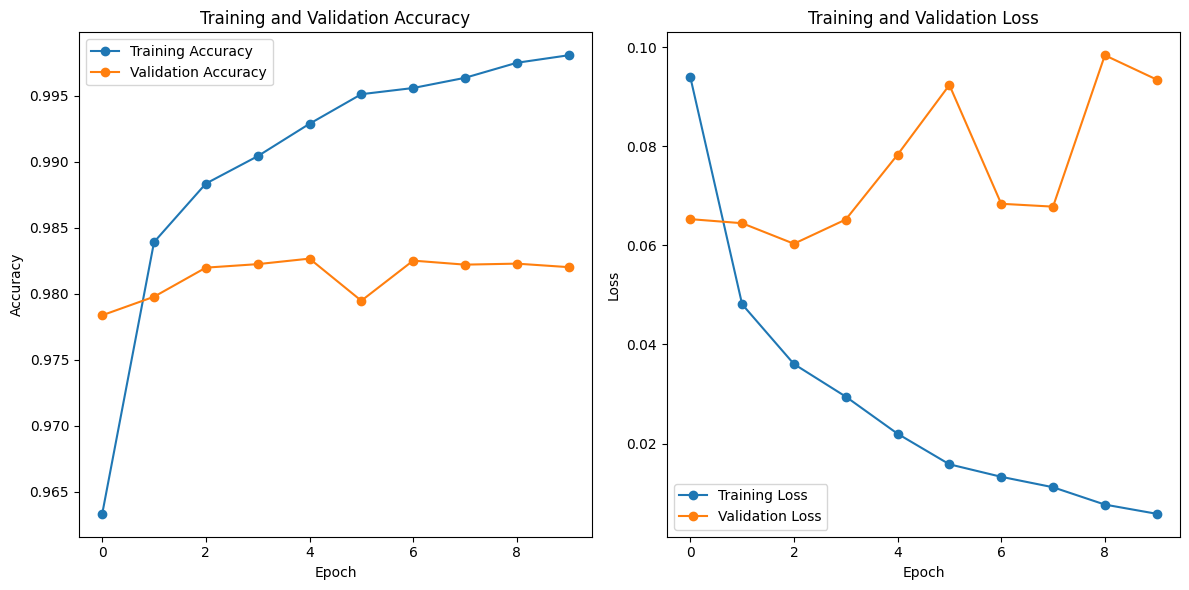

In [9]:
hlp.plot_history(history)

In [7]:
## mbert model and tokenizer
import torch
from transformers import BertTokenizer, BertForSequenceClassification

saved_model_path = 'G:\My Drive\Hate Speech_Multilingual\Code\Model training\Hate_VS_Non-Hate\saved_models\mBert(bert)-english'
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
tokenizer = BertTokenizer.from_pretrained(f'{saved_model_path}\\tokenizer')
model = BertForSequenceClassification.from_pretrained(f'{saved_model_path}\model_epoch_5', num_labels=N_CLASSES)
optimizer = torch.optim.AdamW(model.parameters(), lr=LEARNING_RATE)
model = model.to(device)

c:\Users\Abdul Manaf\AppData\Local\Programs\Python\Python39\lib\site-packages\huggingface_hub\utils\_runtime.py:184: UserWarning: Pydantic is installed but cannot be imported. Please check your installation. `huggingface_hub` will default to not using Pydantic. Error message: '{e}'
  warnings.warn(


In [8]:
test_data_loader = hlp.create_data_loader(test_texts, test_labels, tokenizer, MAX_LEN, BATCH_SIZE)

test_acc, test_loss, test_label_actual, test_label_pred = hlp.eval_model(model, test_data_loader, device)

print(f'Test Accuracy: {test_acc} Test Loss: {test_loss}')

Test Accuracy: 0.9830611469806305 Test Loss: 0.07267124031444908


Accuracy: 0.98
F1 Score: 0.98
Precision: 0.98
Recall: 0.98

Classification Report:
              precision    recall  f1-score   support

    Non-Hate       0.98      0.99      0.99     16008
        Hate       0.98      0.98      0.98     10322

    accuracy                           0.98     26330
   macro avg       0.98      0.98      0.98     26330
weighted avg       0.98      0.98      0.98     26330



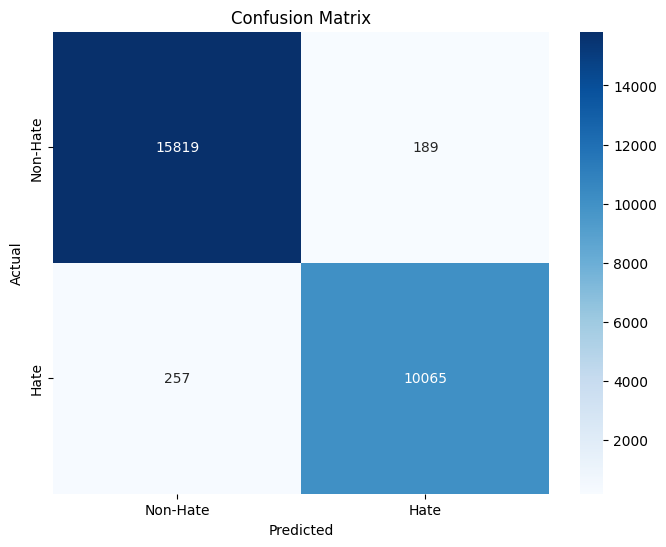

In [9]:
hlp.plot_confusion_matrix(test_label_actual, test_label_pred, ['Non-Hate', 'Hate'])

In [10]:
test_texts = ["This is the sort of thing that happens in a shithole country. @URL"]
preds, confidence = hlp.predict(test_texts, model, tokenizer, MAX_LEN, device)

if preds[0] == 1:
    print(f'Predicted class: Hate Speech \nConfidence: {confidence[0][1]:.2f}')
else:
    print(f'Predicted class: Not Hate Speech \nConfidence: {confidence[0][0]:.2f}')

Predicted class: Hate Speech 
Confidence: 0.69
